# World Billionaires Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:/Users/ASUS/Downloads/Billionaire.csv')
df102 = pd.read_csv(r'C:/Users/ASUS/Downloads/Billionaire02.csv')

# Analysis On DF

In [3]:
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [4]:
df.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


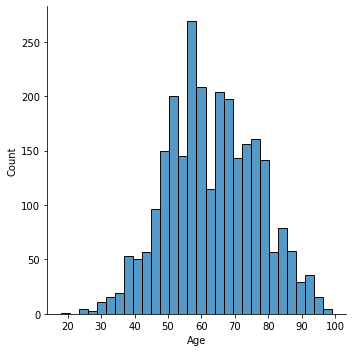

In [6]:
# Showing age by plot

sns.displot(data=df,x='Age')

Text(0.5, 1.0, 'Top 10 billionaires and their Net Worth')

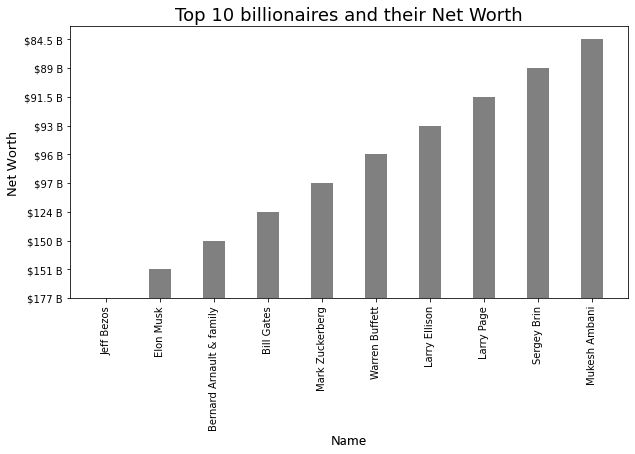

In [7]:
# Top 10 billi with net worth

top10 = df[['Name','NetWorth']]
name = top10.Name[0:10].to_frame()
networth = top10.NetWorth[0:10]
xaxis_name = np.arange(len(name))

plt.figure(figsize=(10,5))
plt.bar(xaxis_name,networth,width=0.4,align="center",color="grey")
font_style={'family':'calibri','size':15,'color':'k'}
plt.xlabel("Name",fontdict=font_style)
plt.ylabel("Net Worth",fontdict=font_style)
plt.xticks(xaxis_name,name["Name"],rotation=90)
plt.title("Top 10 billionaires and their Net Worth", fontsize = 18,color='k')

In [8]:
df['Industry'].value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

Text(0.5, 1.0, 'Number of Billionaires according to their Industry')

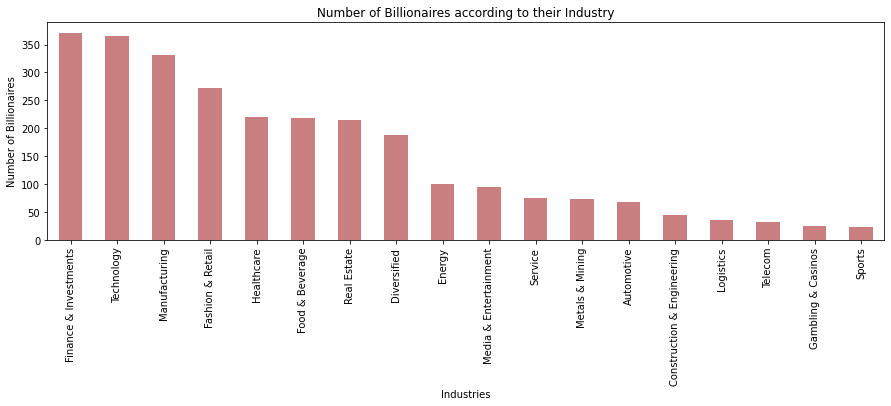

In [9]:
# Showing number of billionaires according to their industry

df['Industry'].value_counts().plot(kind='bar',figsize=(15,4),color='brown',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel("Industries")
plt.ylabel("Number of Billionaires")
plt.title("Number of Billionaires according to their Industry")

Text(0.5, 1.0, 'Number of Billionaires of Top 10 countries')

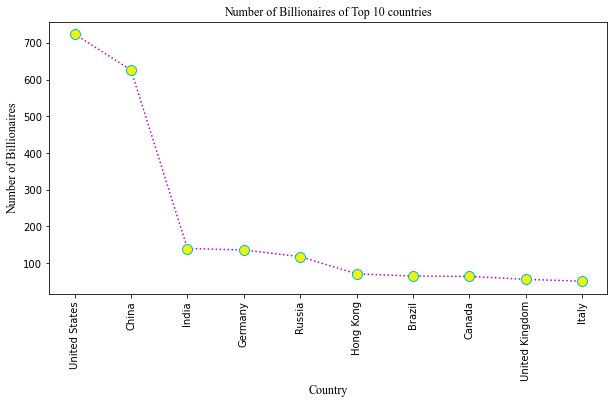

In [10]:
# Showing the count of billionaires of top 10 countries

Country = df.groupby("Country")
country01=pd.DataFrame(Country.size().sort_values(ascending=False), columns=["Count"])

plt.figure(figsize=(10,5))
plt.plot(country01.index[:10],country01["Count"][:10],
         linestyle='dotted',marker='o',ms="10",mec="c",mfc="#F1F112",c='m')

font_style={'family':'times new roman','size':12,'color':'k'}
plt.xticks(rotation=90)

plt.xlabel("Country",fontdict=font_style)
plt.ylabel("Number of Billionaires",fontdict=font_style)
plt.title("Number of Billionaires of Top 10 countries",fontdict=font_style)


In [11]:
df['Age'].mean()

63.1136023916293

Text(0.5, 1.0, 'Age Mean')

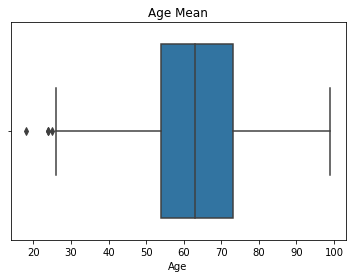

In [12]:
# Showing Age mean using boxplot

plt.figure(figsize=(6,4))
df['Age'].value_counts()

sns.boxplot(data = df,x='Age')
plt.title('Age Mean', fontsize = 12)

Text(0, 0.5, 'Count')

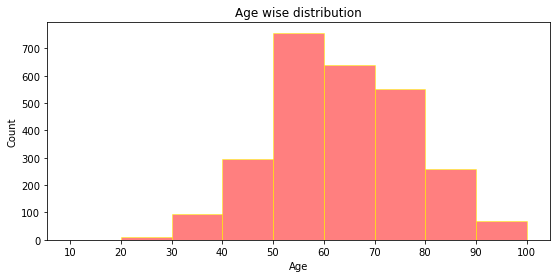

In [13]:
# Showing Age wise distribution according to Billionaires count

Age = df['Age']
Age_Jump = np.arange(10,110,10)

plt.figure(figsize=(9,4))
plt.hist(Age,Age_Jump,facecolor="red",edgecolor="yellow",alpha=0.5)  
plt.xticks(Age_Jump)
plt.title("Age wise distribution")
plt.xlabel("Age")
plt.ylabel("Count")

(18.0, 32.0)

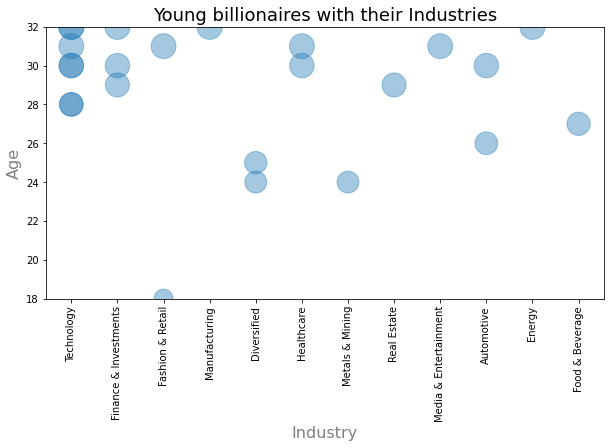

In [14]:
# Showing Young billionaires with their Industries

youth=df[df['Age']<=35]

df1 = youth[['Industry','Age']].copy()
df1['freq_count'] = df1.groupby('Industry')['Industry'].transform('count')
df2=df1.groupby('freq_count').apply(lambda x: x.sort_values('Industry'))
df2=df2.sort_index(ascending=False)
df2["Industry"].value_counts()

x_categ=df2["Industry"]
y_age=df2["Age"]
 
plt.figure(figsize=(10,5))

plt.scatter('Industry', 'Age',s=y_age*20,data=df2,alpha=0.4)

plt.xlabel("Industry", size=16,color="Gray")
plt.ylabel("Age", size=16,color="Gray")

plt.title("Young billionaires with their Industries", size=18)
plt.xticks(rotation=90)
plt.ylim(18,32)


In [20]:
# Replacing '$' and 'B' with '' in NetWorth

df['NetWorth'] = df['NetWorth'].apply(lambda x: x.replace("$",''))

In [21]:
df['NetWorth'] = df['NetWorth'].apply(lambda x: x.replace("B",''))

In [22]:
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,1,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,1,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,1,China,conglomerate,2674,58.0,Diversified


In [24]:
# Billionaire from technology and automotive industry

selected_billionaire01 = df[df['Industry'] == 'Technology']
selected_billionaire02 = df[df['Industry'] == 'Automotive']
selected_billionaire = pd.concat([selected_billionaire01, selected_billionaire02])
selected_billionaire

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology
6,Larry Ellison,93,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
...,...,...,...,...,...,...,...
2383,Christian Bertermann,1.2,Germany,used car sales,2378,37.0,Automotive
2430,Hakan Koc,1.2,Germany,online car sales,2378,36.0,Automotive
2453,Ulrich Mommert & family,1.2,Austria,lighting,2378,80.0,Automotive
2568,Hiroshi Ishibashi,1.1,Japan,tires,2524,74.0,Automotive


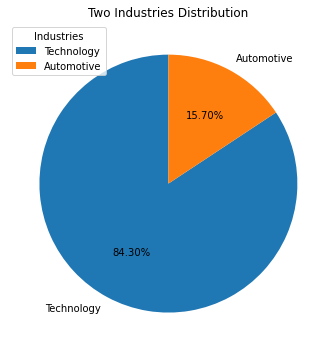

In [25]:
# Showing Value of industry through Pie Chart

Industries= selected_billionaire['Industry'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(Industries, labels = Industries.index, startangle = 90, autopct="%.2f%%")
plt.legend(title="Industries")
plt.title("Two Industries Distribution")
plt.tight_layout()
plt.show()

In [26]:
Billionaire_India = df[df['Country'] == 'India']
print("The column is:")
Billionaire_India = Billionaire_India.reset_index(drop = True)
Billionaire_India

The column is:


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified
1,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58.0,Diversified
2,Shiv Nadar,23.5,India,software services,71,75.0,Technology
3,Radhakishan Damani,16.5,India,"retail, investments",117,66.0,Fashion & Retail
4,Uday Kotak,15.9,India,banking,121,62.0,Finance & Investments
...,...,...,...,...,...,...,...
135,Ramesh Kumar Dua,1,India,footwear,2674,67.0,Fashion & Retail
136,Ashok Kajaria,1,India,tiles,2674,73.0,Manufacturing
137,T.S. Kalyanaraman,1,India,jewelry,2674,73.0,Fashion & Retail
138,Rafique Malik,1,India,footwear,2674,70.0,Fashion & Retail


In [27]:
top30_Billions=df.loc[:30,['Age','Industry','Country']]
df1=top30_Billions.copy()

In [28]:
# Billionaires in top 30 list industries 

top30_Billions["Industry"].value_counts()

Technology               12
Fashion & Retail          8
Diversified               4
Finance & Investments     2
Telecom                   2
Automotive                1
Food & Beverage           1
Media & Entertainment     1
Name: Industry, dtype: int64

In [29]:
# Billionaires in top 30 list Countries

top30_Billions["Country"].value_counts()

United States    19
China             4
France            2
India             2
Japan             2
Spain             1
Mexico            1
Name: Country, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
lcat=LabelEncoder()
lcou=LabelEncoder()
df1["category_enc"]=lcat.fit_transform(top30_Billions.Industry)
df1["country_enc"]=lcou.fit_transform(top30_Billions.Country)
x_scale=(df1["Industry"].unique().shape)[0]

In [31]:
df1["category_enc"].unique()
df1["country_enc"].unique()

array([6, 1, 2, 5, 0, 4, 3])

([<matplotlib.axis.XTick at 0x1d7851b01c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

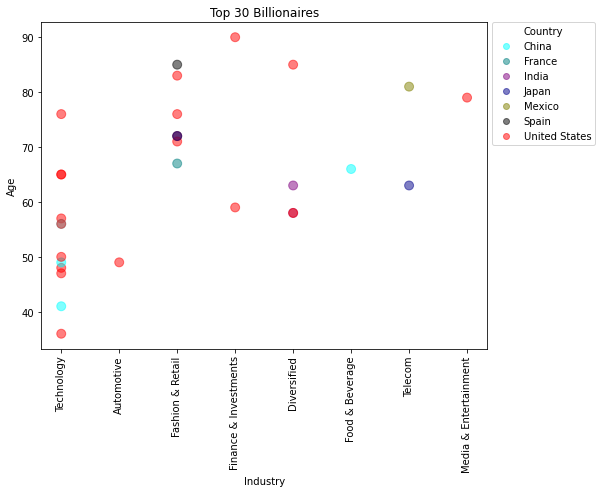

In [32]:
# Ploting Listed Color Map to show Relation between Top 30 Biilionaire's age and Industry

from matplotlib.colors import ListedColormap

plt.figure(figsize=(8,6))
colors=ListedColormap(['cyan', 'teal', 'green','purple','darkblue','yellow','olive','black','red'])
scatter=plt.scatter(df1["Industry"],df1["Age"],c=df1.Country.astype('category').cat.codes,
            marker="o",s=80,alpha=0.5,cmap=colors)

plt.xlabel("Industry")
plt.ylabel("Age")
plt.title("Top 30 Billionaires")

Country=lcou.inverse_transform([0,1,2,3,4,5,6]).tolist()
plt.legend(handles=scatter.legend_elements()[0],labels=Country,
           title="Country",bbox_to_anchor=(1.01, 1),
                      borderaxespad=0)

plt.xticks(lcat.inverse_transform(range(0,x_scale)),rotation='vertical')

Text(0.5, 1.0, 'Relationship between NetWorth and age')

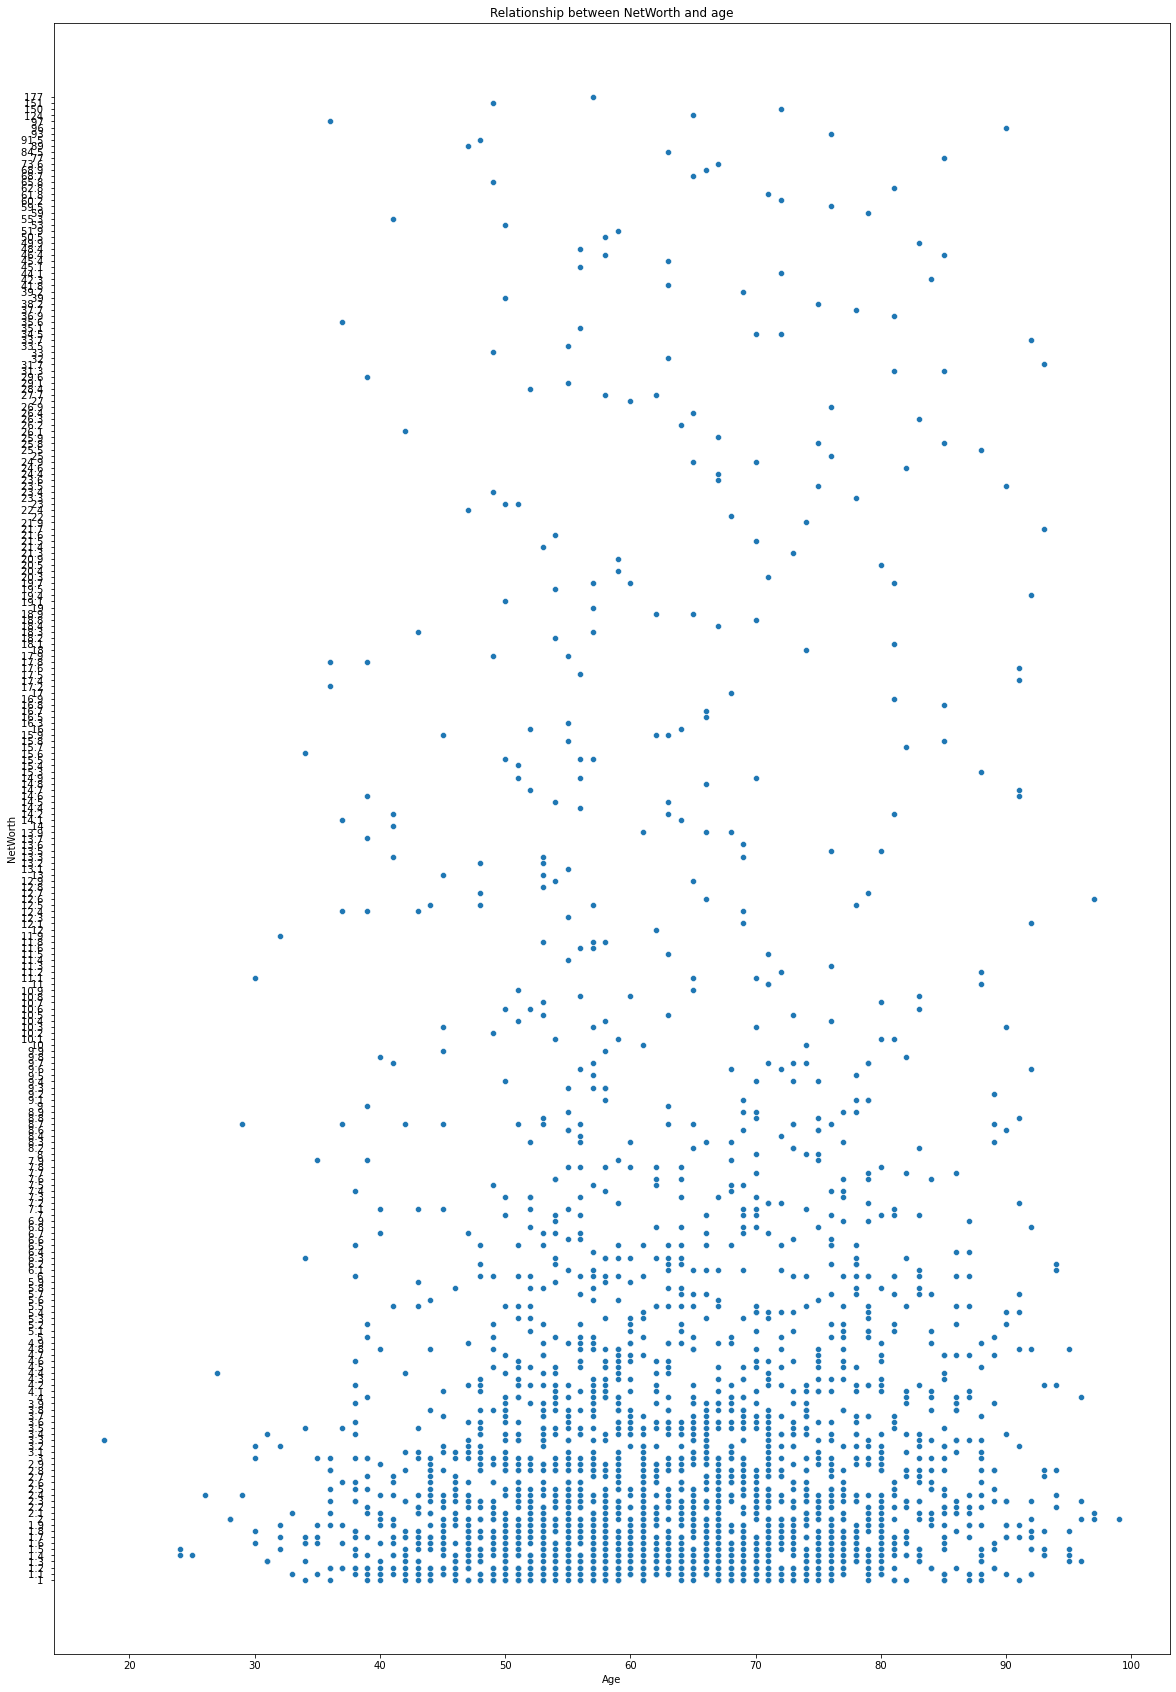

In [33]:
# Showing Relation between NetWorth and Age

plt.figure(figsize=(20,30))
sns.scatterplot(x=df["Age"], y=df["NetWorth"])
plt.title('Relationship between NetWorth and age', fontsize = 12)

In [34]:
# Making a new column showing Difference of ages 

df['Old_and_young'] = pd.cut(df['Age'], bins = [18, 30, 50, 100], include_lowest = True, labels = ['18-30', '30-50', '50+'])
df['Old_and_young']

0         50+
1       30-50
2         50+
3         50+
4       30-50
        ...  
2750    30-50
2751      50+
2752      50+
2753      50+
2754      50+
Name: Old_and_young, Length: 2755, dtype: category
Categories (3, object): ['18-30' < '30-50' < '50+']

<AxesSubplot:>

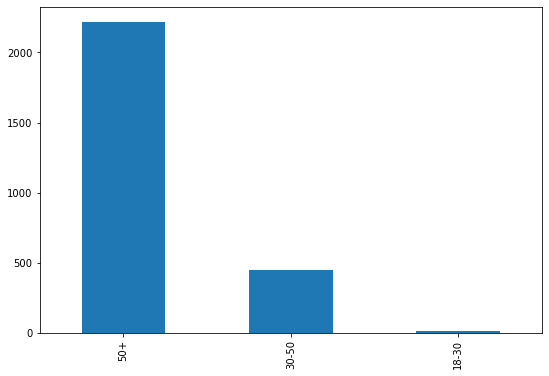

In [35]:
# Ploting a bar graph showing Age difference 

df['Old_and_young'].value_counts().plot(kind='bar', figsize=(9,6))

# Analysis of DF102

In [52]:
df102

,year,rank,name,net_worth,age,natinality,source_wealth
0,2021,1,Jeff Bezos,177,57,United States,Amazon
1,2021,2,Elon Musk,151,49,United States,"Tesla, SpaceX"
2,2021,3,Bernard Arnault & family,150,72,France,LVMH
3,2021,4,Bill Gates,124,65,United States,Microsoft
4,2021,5,Mark Zuckerberg,97,36,United States,Facebook
...,...,...,...,...,...,...,...
195,2002,6,Al-Waleed bin Talal,20.0,43,Saudi Arabia,Kingdom Holding Company
196,2002,7,S. Robson Walton,20.0,57,United States,Wal-Mart
197,2002,8,Masayoshi Son,19.4,43,Japan,"Softbank Capital, SoftBank Mobile"
198,2002,9,Michael Dell,19.1,35,United States,Dell


In [53]:
df102.columns

Index(['year', 'rank', 'name', 'net_worth', 'age', 'natinality',
       'source_wealth'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           2755 non-null   object  
 1   NetWorth       2755 non-null   object  
 2   Country        2755 non-null   object  
 3   Source         2755 non-null   object  
 4   Rank           2755 non-null   int64   
 5   Age            2676 non-null   float64 
 6   Industry       2755 non-null   object  
 7   Year           2755 non-null   int64   
 8   Old_and_young  2676 non-null   category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 175.1+ KB


In [36]:
# Showing NetWorth of Top 10 Billionaires of 3 years 

df102.groupby(['year','name'])['net_worth'].sum().tail(30)

year  name                    
2019  Amancio Ortega              62.7
      Bernard Arnault              76 
      Bill Gates                  96.5
      Carlos Slim                  64 
      Jeff Bezos                  131 
      Larry Ellison               62.5
      Larry Page                  50.8
      Mark Zuckerberg             62.3
      Michael Bloomberg           55.5
      Warren Buffett              82.5
2020  Alice Walton                54.4
      Amancio Ortega              55.1
      Bernard Arnault & family     76 
      Bill Gates                   98 
      Jeff Bezos                  113 
      Jim Walton                  54.6
      Larry Ellison                59 
      Mark Zuckerberg             54.7
      S. Robson Walton            54.1
      Warren Buffett              67.5
2021  Bernard Arnault & family    150 
      Bill Gates                  124 
      Elon Musk                   151 
      Jeff Bezos                  177 
      Larry Ellison              

In [37]:
# Showing Bill Gates's data of diffrent years

Bill_Gates = df102[df102['name'] == 'Bill Gates']
print("The column is:")
Bill_Gates = Bill_Gates.reset_index(drop = True)
Bill_Gates

The column is:


,year,rank,name,net_worth,age,natinality,source_wealth
0,2021,4,Bill Gates,124,65,United States,Microsoft
1,2020,2,Bill Gates,98,64,United States,Microsoft
2,2019,2,Bill Gates,96.5,63,United States,Microsoft
3,2018,2,Bill Gates,90,62,United States,Microsoft
4,2017,1,Bill Gates,86.0,61,United States,Microsoft
5,2016,1,Bill Gates,75.0,60,United States,Microsoft
6,2015,1,Bill Gates,79.2,59,United States,Microsoft
7,2014,1,Bill Gates,76.0,58,United States,Microsoft
8,2013,2,Bill Gates,67.0,57,United States,Microsoft
9,2012,2,Bill Gates,61.0,56,United States,Microsoft


(array([2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

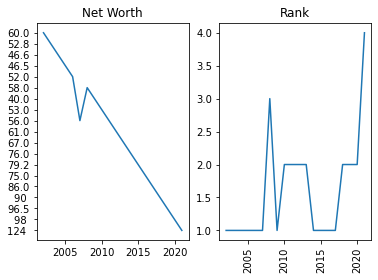

In [38]:
# Showing Bill Gate's Rank and Net Worth over years

fig, (ax1, ax2) = plt.subplots(1, 2)


ax2.plot(Bill_Gates['year'],Bill_Gates['rank'])
ax2.set_title("Rank")

ax1.plot(Bill_Gates['year'],Bill_Gates['net_worth']) 
ax1.set_title("Net Worth")
plt.xticks(rotation = 90)

In [39]:
# Inserting a new column in the dataset "df"

df.insert(7, "Year", 2021)

df

,Name,NetWorth,Country,Source,Rank,Age,Industry,Year,Old_and_young
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology,2021,50+
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive,2021,30-50
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail,2021,50+
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology,2021,50+
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology,2021,30-50
...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1,China,e-commerce,2674,49.0,Technology,2021,30-50
2751,Zhang Yuqiang,1,China,Fiberglass,2674,65.0,Manufacturing,2021,50+
2752,Zhao Meiguang,1,China,gold mining,2674,58.0,Metals & Mining,2021,50+
2753,Zhong Naixiong,1,China,conglomerate,2674,58.0,Diversified,2021,50+


In [40]:
# counting how many times a person came in a list

df102['name'].value_counts()

Bill Gates                      20
Warren Buffett                  19
Larry Ellison                   16
Amancio Ortega                  13
Carlos Slim                     10
Bernard Arnault                  8
Lakshmi Mittal                   7
Jeff Bezos                       6
David Koch                       6
Charles Koch                     6
Mark Zuckerberg                  6
Mukesh Ambani                    5
Paul Allen                       5
Karl Albrecht                    5
Carlos Slim & family             5
Ingvar Kamprad                   5
Al-Waleed bin Talal              4
Li Ka-shing                      4
Michael Bloomberg                3
S. Robson Walton                 3
Eike Batista                     3
Jim Walton                       3
Jim Walton*                      2
Larry Page                       2
Bernard Arnault & family         2
Kenneth Thomson                  2
Alice Walton*                    2
Helen Walton*                    2
John Walton*        

In [41]:
year=df102.groupby('year')
year.describe()

rank                                              age                   \
     count mean       std  min   25%  50%   75%   max count  mean        std   
year                                                                           
2002  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  55.0  15.570628   
2003  10.0  5.2  2.616189  1.0  3.25  5.5  7.75   8.0  10.0  60.8  12.968338   
2004  10.0  4.5  1.900292  1.0  3.25  5.5  6.00   6.0  10.0  61.6  13.882043   
2005  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  62.8  12.787146   
2006  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  64.3  12.970479   
2007  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  65.9  11.512795   
2008  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  63.8  16.287691   
2009  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  70.6  13.672357   
2010  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  66.0  12.328828   
2011  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  63.7   9.031427   
2012  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  70.8  12.072006   
2013  10.0  5.4  2.988868  1.0  3.25  5.5  7.50  10.0  10.0  74.2   9.908470   
2014  10.0  5.4  2.988868  1.0  3.25  5.5  7.50  10.0  10.0  72.3   7.803845   
2015  10.0  5.4  2.988868  1.0  3.25  5.5  7.50  10.0  10.0  74.3   9.626930   
2016  10.0  5.4  2.875181  1.0  3.25  5.5  7.75   9.0  10.0  68.3  16.330272   
2017  10.0  5.4  2.913570  1.0  3.25  5.5  7.75  10.0  10.0  69.3  16.330272   
2018  10.0  5.4  2.913570  1.0  3.25  5.5  7.75  10.0  10.0  69.6  16.208365   
2019  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  66.7  17.320829   
2020  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  69.2  15.215489   
2021  10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  10.0  60.3  16.166151   

                                      
       min    25%   50%    75%   max  
year                                  
2002  35.0  43.25  51.0  66.00  80.0  
2003  46.0  53.25  56.5  67.75  82.0  
2004  47.0  52.00  57.0  69.75  84.0  
2005  49.0  52.50  60.5  71.75  85.0  
2006  49.0  53.50  61.5  76.50  82.0  
2007  49.0  56.50  69.0  75.25  80.0  
2008  40.0  51.25  62.5  76.75  88.0  
2009  52.0  59.50  71.0  81.75  89.0  
2010  53.0  55.50  63.5  73.00  90.0  
2011  53.0  56.25  62.0  69.75  80.0  
2012  55.0  63.25  69.5  79.50  92.0  
2013  57.0  69.00  74.5  80.75  90.0  
2014  58.0  66.25  73.5  77.75  83.0  
2015  59.0  67.00  74.5  78.75  92.0  
2016  31.0  62.75  74.5  78.25  85.0  
2017  32.0  63.75  75.5  79.25  86.0  
2018  33.0  63.75  75.0  80.25  87.0  
2019  34.0  57.00  72.0  78.50  88.0  
2020  35.0  65.50  71.0  76.50  89.0  
2021  36.0  48.25  60.0  70.25  90.0

In [42]:
# Describing data of Billionaires by Age

df102.groupby(by=["year","age"]).describe()

rank                                              
         count  mean       std   min   25%   50%   75%   max
year age                                                    
2002 35    1.0   9.0       NaN   9.0   9.0   9.0   9.0   9.0
     43    2.0   7.0  1.414214   6.0   6.5   7.0   7.5   8.0
     44    1.0   1.0       NaN   1.0   1.0   1.0   1.0   1.0
     47    1.0   3.0       NaN   3.0   3.0   3.0   3.0   3.0
     55    1.0   2.0       NaN   2.0   2.0   2.0   2.0   2.0
...        ...   ...       ...   ...   ...   ...   ...   ...
2021 63    1.0  10.0       NaN  10.0  10.0  10.0  10.0  10.0
     65    1.0   4.0       NaN   4.0   4.0   4.0   4.0   4.0
     72    1.0   3.0       NaN   3.0   3.0   3.0   3.0   3.0
     76    1.0   7.0       NaN   7.0   7.0   7.0   7.0   7.0
     90    1.0   6.0       NaN   6.0   6.0   6.0   6.0   6.0

[191 rows x 8 columns]

In [43]:
# Mean of Net Worth and age of every year

year['net_worth','age'].mean()

,age
year,
2002,55.0
2003,60.8
2004,61.6
2005,62.8
2006,64.3
2007,65.9
2008,63.8
2009,70.6
2010,66.0


Text(0, 0.5, 'Mean Age over the year')

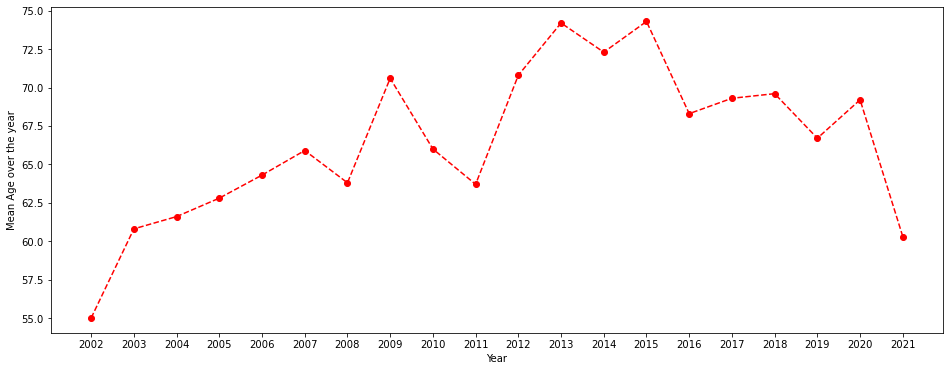

In [44]:
# Graph showing mean age over the years

plt.figure(figsize=[16,6])
y = df102.groupby('year').mean()['age']
x = list(range(2002,2022))
plt.plot(x,y, marker ='o', linestyle='--', color='r', label='Square')
plt.xticks(x,x)
plt.xlabel('Year')
plt.ylabel('Mean Age over the year')

In [45]:
# Median

year[['net_worth','age']].median()

,age
year,
2002,51.0
2003,56.5
2004,57.0
2005,60.5
2006,61.5
2007,69.0
2008,62.5
2009,71.0
2010,63.5


Text(0, 0.5, 'Median Age over the year')

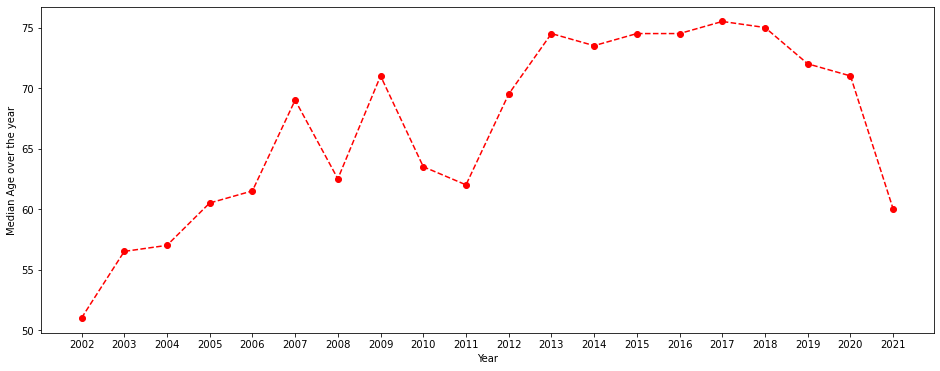

In [46]:
# Graph showing median age over the years

plt.figure(figsize=[16,6])
y = df102.groupby('year').median()['age']
x = list(range(2002,2022))
plt.plot(x,y, marker ='o', linestyle='--', color='r', label='Square')
plt.xticks(x,x)
plt.xlabel('Year')
plt.ylabel('Median Age over the year')

In [47]:
# Mode

df102.describe(include='object')

,name,net_worth,natinality,source_wealth
count,200,200,200,200
unique,49,141,13,40
top,Bill Gates,20.0,United States,Microsoft
freq,20,9,115,25


In [48]:
# Finding and showing name,year,net worth of selected Billionaires

filter= ['Bill Gates','Jeff Bezos','Mark Zuckerberg','Paul Allen','Larry Ellison']
df102[df102['name'].isin(filter)][['name','year','net_worth']]

,name,year,net_worth
0,Jeff Bezos,2021,177
3,Bill Gates,2021,124
4,Mark Zuckerberg,2021,97
6,Larry Ellison,2021,93
10,Jeff Bezos,2020,113
11,Bill Gates,2020,98
14,Larry Ellison,2020,59
16,Mark Zuckerberg,2020,54.7
20,Jeff Bezos,2019,131
21,Bill Gates,2019,96.5


Text(0.5, 1.0, 'Net Worth of Selected Billionaire over years')

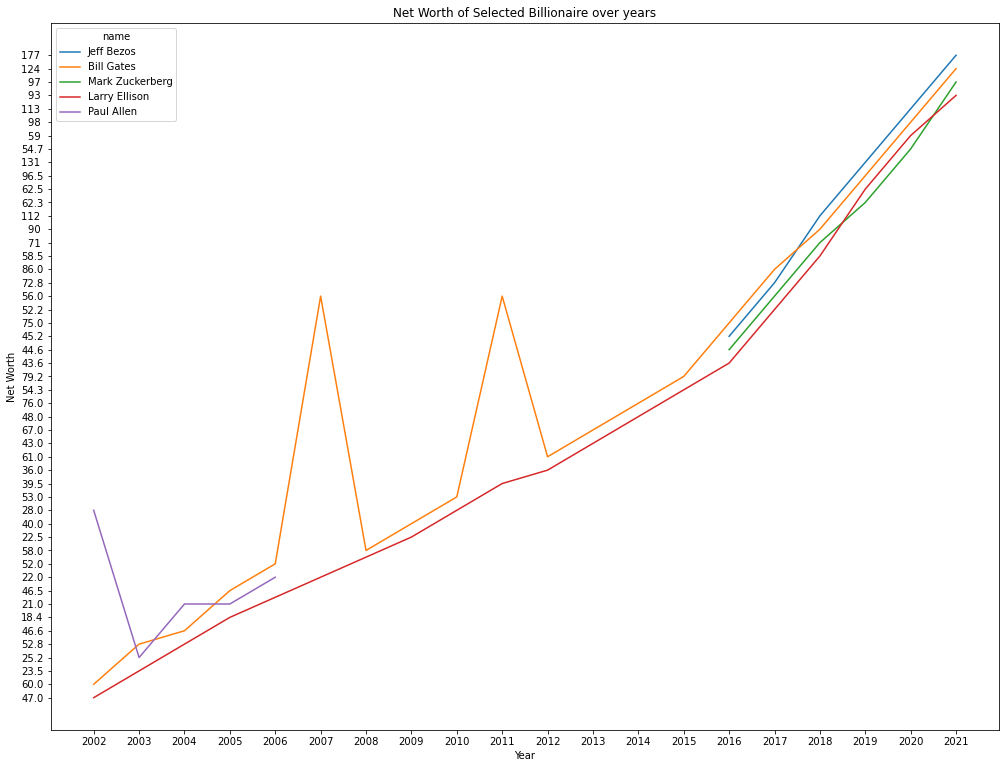

In [49]:
# comparing net worth of the selected billionaires with each other

plt.figure(figsize=(17,13))
filter = ['Bill Gates','Jeff Bezos','Mark Zuckerberg','Paul Allen','Larry Ellison']
comparison = df102[df102['name'].isin(filter)][['name','year','net_worth']]

sns.lineplot(data=comparison,x='year',y='net_worth',hue='name')
plt.xticks(x,x)
plt.xlabel('Year')
plt.ylabel('Net Worth')
plt.title('Net Worth of Selected Billionaire over years')

In [50]:
year['net_worth'].std()

year
2002    14.434665
2003    10.266889
2004    10.229152
2005    10.339761
2006    11.020304
2007    13.004380
2008    13.631662
2009     8.439648
2010    11.932011
2011    15.351399
2012    15.050079
2013    16.353814
2014    15.550791
2015    16.239732
2016    12.636824
2017    13.873976
2018    16.689132
2019    24.054050
2020    20.995195
2021    32.952154
Name: net_worth, dtype: float64

Text(0, 0.5, 'Standard Deviation of net_worth over the year')

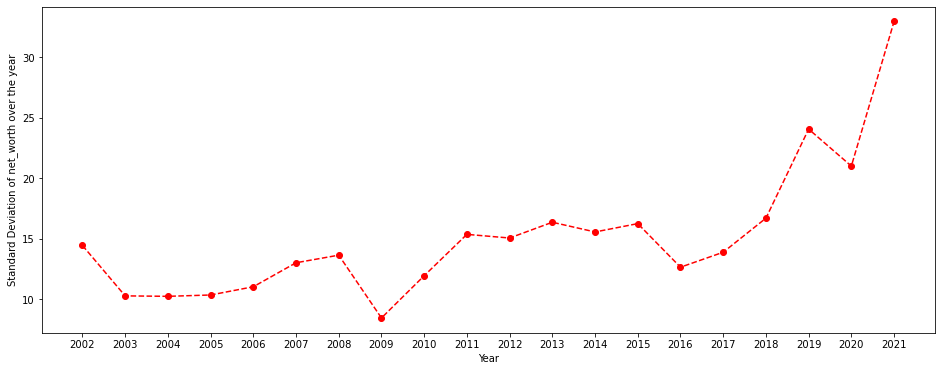

In [51]:
# Graph showing standard deviation age over the years

plt.figure(figsize=[16,6])
y = df102.groupby('year')['net_worth'].std()
x = list(range(2002,2022))
plt.plot(x,y, marker ='o', linestyle='--', color='r', label='Square')
plt.xticks(x,x)
plt.xlabel('Year')
plt.ylabel('Standard Deviation of net_worth over the year')

# Conclusion

The World Billionaires Data includes, All the basic information of Billionaires from all over the world. It includes feilds like Name, NetWorth, Country, Source, Rank, Age, Industry. This information was used to do some analysis on the Billionaires. I inserted few columns when needed like Year, Old_and_young. 

The other dataset was used to do Analysis on Top 10 Billionaire for 20 years. 

In this Analysis you will have a look on:-
1. Which age group people are the most Billionaires 
2. Top 10 Billionaire with their Net Worth 
3. Number of billionaires according to thier Most Popular Industry 
4. Most Billionaires from top 10 Countries 
5. Age mean on boxplot
6. Age wise distribution according to Billionaires count
7. Billionaires in top 30 list industries
8. Billionaires in top 30 list Countries
9. Listed Color Map to show Relation between Top 30 Biilionaire's age and Industry
10. Relation between NetWorth and Age
11. NetWorth of Top 10 Billionaires of 3 years 
12. Bill Gates's data of diffrent years
13. Showing the Mean, Median, Mode, Standard Deviation on graph
14. Comparing net worth of the selected billionaires with each other

This Analysis is useful for:-
1. Success rate of People planning for startups or have some business ideas.
    a. by looking on the data of highest networth industry 
    b. most successful industry and most successful billionaires
2. Analysing the business environment of a country.
3. predicting the upcoming Wealth by looking on the success rate over years